### Task



*   Load MNIST dataset (Hand written digits dataset)
*   Train DNN and experiment with different number of layers and neurons.
*  Now train the DNN with only two class from the dataset (A binary classifier using DNN)
* Apply Normalization to the image data and then train, and analyze the improvement.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

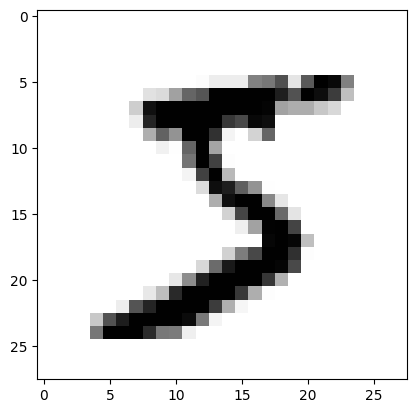

In [9]:
plt.imshow(x_train[0], cmap='binary')
plt.show()

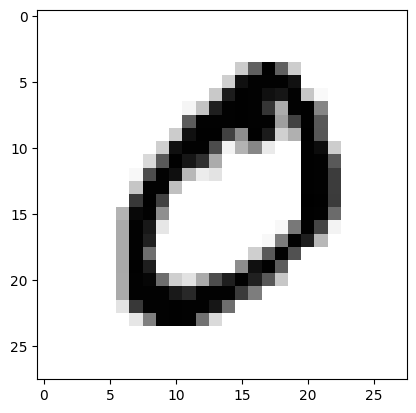

In [10]:
plt.imshow(x_train[1], cmap='binary')
plt.show()

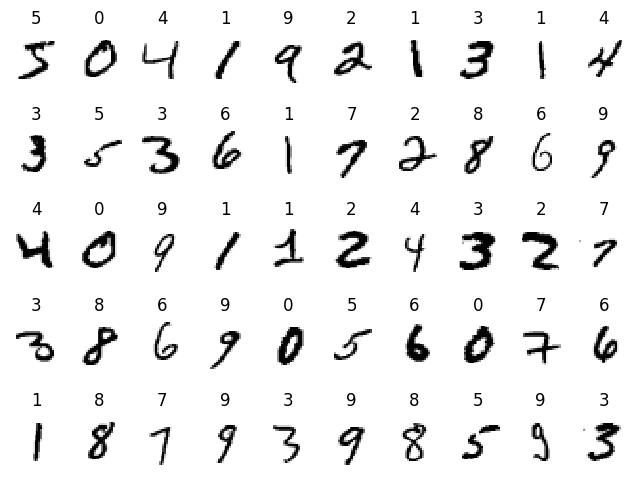

In [18]:
class_names = ['0','1','2','3','4','5','6','7','8','9']
n_rows=5
n_cols=10
plt.figure(figsize=(8,6))
for row in range(n_rows):
    for col in range(n_cols):
        index=n_cols*row + col
        plt.subplot(n_rows, n_cols, index +1)
        plt.imshow(x_train[index], cmap = 'binary', interpolation = 'nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]])

In [19]:
DNN = keras.models.Sequential()
DNN.add(keras.layers.Flatten(input_shape = [28,28]))
DNN.add(keras.layers.Dense(600, activation = 'relu'))
DNN.add(keras.layers.Dense(300, activation = 'relu'))
DNN.add(keras.layers.Dense(100, activation = 'relu'))
DNN.add(keras.layers.Dense(10, activation = 'softmax'))

d:\AIML\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
DNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 600)            │       471,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │       180,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 682,410 (2.60 MB)

 Trainable params: 682,410 (2.60 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
DNN.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Compile = get the network ready to learn.
Loss = tells it how wrong it is.
Optimizer = smart teacher who helps it learn faster.
Accuracy = score to see how good it’s doing

In [23]:
tbCallBack = keras.callbacks.TensorBoard(log_dir = "tbGraph/")

a notebook for the network to write down its scores and progress while learning, so we can watch how it improves.”

In [24]:
history_DNN = DNN.fit(x_train, y_train, epochs = 10, validation_split = 0.1, callbacks = [tbCallBack])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8922 - loss: 0.9430 - val_accuracy: 0.9463 - val_loss: 0.1893
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9482 - loss: 0.1869 - val_accuracy: 0.9550 - val_loss: 0.2006
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9585 - loss: 0.1514 - val_accuracy: 0.9637 - val_loss: 0.1351
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9651 - loss: 0.1255 - val_accuracy: 0.9610 - val_loss: 0.1458
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9688 - loss: 0.1190 - val_accuracy: 0.9702 - val_loss: 0.1064
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9735 - loss: 0.0998 - val_accuracy: 0.9597 - val_loss: 0.1675
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9761 - loss: 0.0882 - val_accuracy: 0.9678 - val_loss: 0.1286
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9783 -

fit :- letting our network practice.  
validation_split=0.1  :- The network keeps aside 10% of the images (0.1) to test itself while learning

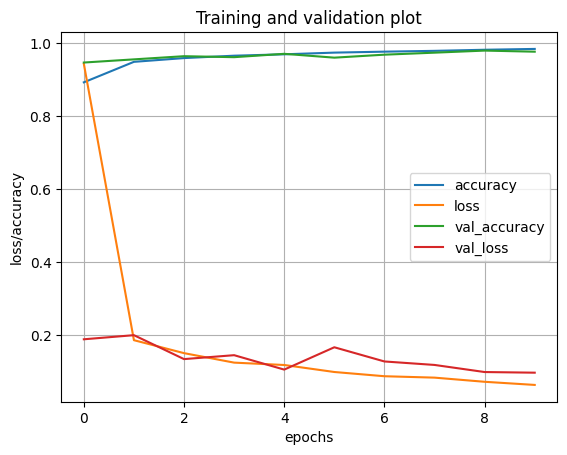

In [25]:
import pandas as pd
pd.DataFrame(history_DNN.history).plot()    ## takes all the training results your network wrote down (from history_DNN).and puts them into a table
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [26]:
test_loss, test_accuracy = DNN.evaluate(x_test, y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9736 - loss: 0.1283
Test loss: 0.12828463315963745, Test accuracy: 0.9735999703407288


We’re giving the network a final test with new pictures it never saw before.
It tells us how many it got right (accuracy) and how many it got wrong (loss)

#### Now train the DNN with only two class from the dataset(A BINARY CLASSIFIER USING DNN)

In [27]:
train_filter = np.where((y_train == 0) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

In [28]:
x_train_bin, y_train_bin = x_train[train_filter], y_train[train_filter]
x_test_bin, y_test_bin = x_test[test_filter], y_test[test_filter]

In [29]:
y_train_bin = (y_train_bin == 1).astype(int)
y_test_bin = (y_test_bin == 1).astype(int)

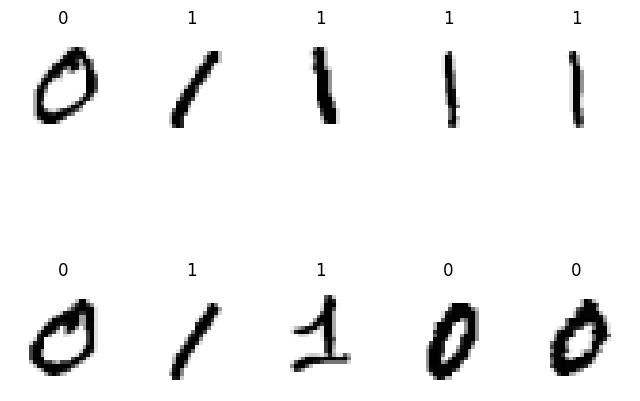

In [30]:
class_names = ['0','1']
n_rows=2
n_cols=5
plt.figure(figsize = (8,6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train_bin[index], cmap = 'binary', interpolation = 'nearest')
        plt.axis('off')
        plt.title(class_names[y_train_bin[index]])

In [31]:
DNN_bin = keras.models.Sequential()
DNN_bin.add(keras.layers.Flatten(input_shape = [28,28]))
DNN_bin.add(keras.layers.Dense(300, activation = 'relu'))
DNN_bin.add(keras.layers.Dense(1, activation = 'sigmoid'))

d:\AIML\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
DNN_bin.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
history_DNN_bin=DNN_bin.fit(x_train_bin, y_train_bin, epochs = 10, validation_split = 0.1, callbacks = [tbCallBack])

Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9950 - loss: 0.6590 - val_accuracy: 1.0000 - val_loss: 3.1278e-11
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9979 - loss: 0.3444 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9987 - loss: 0.1363 - val_accuracy: 0.9976 - val_loss: 0.0639
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9996 - loss: 0.0430 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9991 - loss: 0.0854 - val_accuracy: 1.0000 - val_loss: 5.0761e-26
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9996 - loss: 0.0623 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9994 - loss: 0.0280 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9989 - loss: 

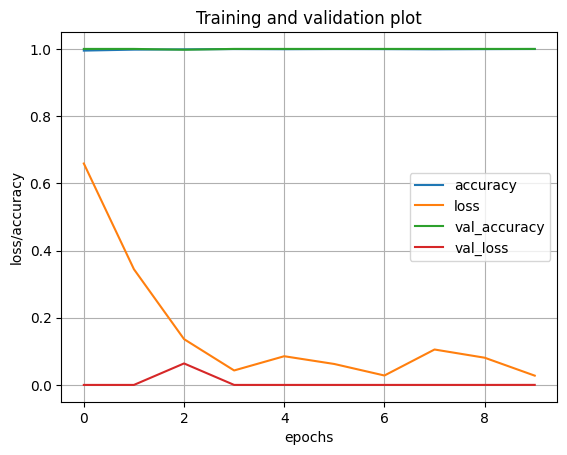

In [34]:
import pandas as pd
pd.DataFrame(history_DNN_bin.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [35]:
test_loss_bin, test_accuracy_bin = DNN_bin.evaluate(x_test_bin, y_test_bin)
print("Test loss: {}, Test accuracy: {}".format(test_loss_bin, test_accuracy_bin))

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9995 - loss: 0.0569    
Test loss: 0.056902505457401276, Test accuracy: 0.9995272159576416


In [36]:
x_mean=x_train.mean()
x_std=x_train.std()
x_train_norm=(x_train - x_mean)/(x_std)
x_test_norm=(x_test - x_mean)/(x_std)

In [37]:
DNN_norm = keras.models.Sequential()
DNN_norm.add(keras.layers.Flatten(input_shape = [28,28]))
DNN_norm.add(keras.layers.Dense(600, activation = 'relu'))
DNN_norm.add(keras.layers.Dense(300, activation = 'relu'))
DNN_norm.add(keras.layers.Dense(100, activation = 'relu'))
DNN_norm.add(keras.layers.Dense(10, activation = 'softmax'))

d:\AIML\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
DNN_norm.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [39]:
history_DNN_norm = DNN_norm.fit(x_train_norm, y_train, epochs = 10, validation_split = 0.1, callbacks = [tbCallBack])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9349 - loss: 0.2109 - val_accuracy: 0.9668 - val_loss: 0.1148
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9682 - loss: 0.1048 - val_accuracy: 0.9730 - val_loss: 0.0879
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9772 - loss: 0.0743 - val_accuracy: 0.9742 - val_loss: 0.0924
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9807 - loss: 0.0611 - val_accuracy: 0.9748 - val_loss: 0.0958
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9844 - loss: 0.0506 - val_accuracy: 0.9713 - val_loss: 0.0978
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9857 - loss: 0.0447 - val_accuracy: 0.9775 - val_loss: 0.0950
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9878 - loss: 0.0397 - val_accuracy: 0.9747 - val_loss: 0.1035
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9897 - 

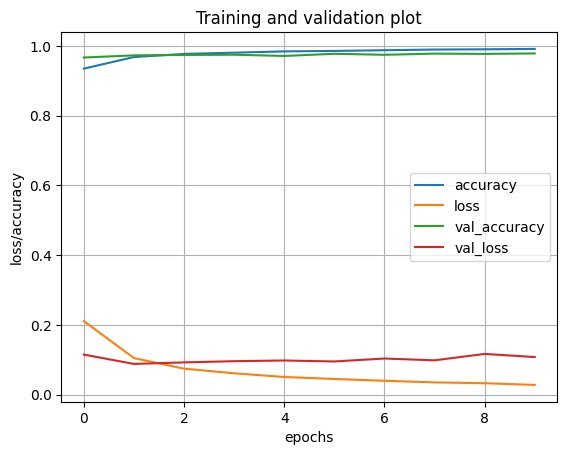

In [ ]:
import pandas as pd
pd.DataFrame(history_DNN_norm.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("Training and validation plot")
plt.show()

In [ ]:
test_loss, test_accuracy = DNN_norm.evaluate(x_test_norm, y_test)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9770 - loss: 0.1089
Test loss: 0.10894008725881577, Test accuracy: 0.9769999980926514
